Copyright 2020-2022 John Penuel, all rights reserved.

# Sound Synthesis

We synthesize (generate) some audio .wav files of tones and then analyze them.

In [1]:
#python libary for .wav file processing
import wave 

import IPython.display

#structured data handling
import struct 

import matplotlib.pyplot as plt
import numpy as np
import random

import sys
print("Python version: ",sys.version)
print("Byte ordering: ",sys.byteorder)

Python version:  3.8.10 (default, Jun 22 2022, 20:18:18) 
[GCC 9.4.0]
Byte ordering:  little


### Synthesis:

We set the following parameters and generate the data for our first sound.

In [2]:
fs = 8000 #sampling frequency (samples/second).  
# Human voice goes up to approximately 4000Hz.  Nyquist says double that.
# Note that this is not a particularly high sampling rate.  
# CD-quality audio is 44100 samples/second.


ts = 1/fs #time between samples

f = 440 # Signal frequency.  440Hz is middle A
A = 2**8-1 #amplitude. we are creating 1-byte (8-bit), unsigned, samples.
# Note that 8000/samples per second at 8-bits per sample is 64,000 bits per second.
# This is historically a voice-grade telephone line.


t = np.arange(0,5,ts) #create a a range from 0 to 5 seconds, in ts intervals
s = np.cos(2*np.pi*f*t) #create signal

#scale and convert signal to be between 0-255
shift = abs(min(s))
s = s + shift*np.ones(len(s)) #shift up so all values are positive
mx = max(s)
s = A*s/mx #scale


Write out the .wav file from our data.  (Docs: https://docs.python.org/3/library/wave.html)

In [3]:
# wave package variables
nchannels=1 #only 1 channel; mono, not stereo
sampwidth=1 #1 byte (8 bits) per sample
framerate=fs #sample rate, in samples per second
nframes=len(t) #number of frames
comptype="NONE" #not compressed
compname="not compressed"

fileName = "middle-A-440Hz-5seconds.wav"
wavWrite = wave.open(fileName, 'wb') #open the file with write privileges
wavWrite.setnchannels(nchannels)
wavWrite.setsampwidth(sampwidth)
wavWrite.setframerate(framerate)
wavWrite.setnframes(nframes)
wavWrite.setcomptype(comptype,compname)
print(wavWrite)

for sample in s:
    wavWrite.writeframesraw(struct.pack('B', int(sample)))#set format to 'B', unsigned byte since we are doing 1-byte samples.

wavWrite.close()                       
                        

In [4]:
# play the .wav file back
print(fileName)
IPython.display.Audio(fileName)

middle-A-440Hz-5seconds.wav


In the previous example we created a .wav file with a single tone.  Now we create a C major chord with three tones.

In [5]:
fs = 8000
ts = 1/fs

C4 = 261.63 
E4 = 329.63
G4 = 392.00

t = np.arange(0,5,ts) #create a a range from 0 to 5 seconds, in ts intervals
s = np.cos(2*np.pi*C4*t) + np.cos(2*np.pi*E4*t) + np.cos(2*np.pi*G4*t)
shift = abs(min(s))
s = s + shift*np.ones(len(s)) #shift up so be all positive
mx = max(s)
s = A*s/mx #scale




# wave package variables
nchannels=1 #only 1 channel; mono, not stereo
sampwidth=1 #1 byte (8 bits) per sample
framerate=fs #sample rate, in samples per second
nframes=len(t) #number of frames
comptype="NONE" #not compressed
compname="not compressed"

fileName = "c-chord-5seconds.wav"
wavWrite = wave.open(fileName, 'wb') #open the file with write privileges
wavWrite.setnchannels(nchannels)
wavWrite.setsampwidth(sampwidth)
wavWrite.setframerate(framerate)
wavWrite.setnframes(nframes)
wavWrite.setcomptype(comptype,compname)
print(wavWrite)

for sample in s:
    wavWrite.writeframesraw(struct.pack('B', int(sample)))#set format to 'B', unsigned byte.


wavWrite.close()
print(fileName)
IPython.display.Audio(fileName)




c-chord-5seconds.wav


### Analysis:

Now we will open the .wav files created and analyze them in the frequency domain.

In [6]:
fileName = "c-chord-5seconds.wav"
wavRead = wave.open(fileName,'rb')
nchannels = wavRead.getnchannels()
sampwidth = wavRead.getsampwidth()
framerate = wavRead.getframerate()
nframes = wavRead.getnframes()
comptype = wavRead.getcomptype()
compname = wavRead.getcompname()


numSamplesRead = 1024
s = wavRead.readframes(numSamplesRead) #read in a specific number of samples
print("num samples read in = ",len(s))
#note that s is packed unsigned bytes.     


wavRead.close()

print("nchannels = ",nchannels)
print("sampwidth = ",sampwidth)
print("framerate = ",framerate)
print("nframes = ",nframes)


ss = np.zeros(len(s))
for i in range(0,len(ss)-1):
    ss[i] = float(s[i]) #convert the structured data to float


num samples read in =  1024
nchannels =  1
sampwidth =  1
framerate =  8000
nframes =  40000


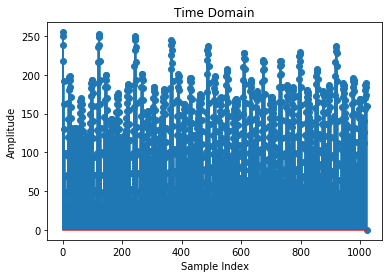

In [7]:
plt.stem(ss,use_line_collection=True)
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.title("Time Domain")
plt.show()

Remember: this is a chord with multiple frequencies in the signal.

Time units are removed from this plot; the x-axis is just sample index.

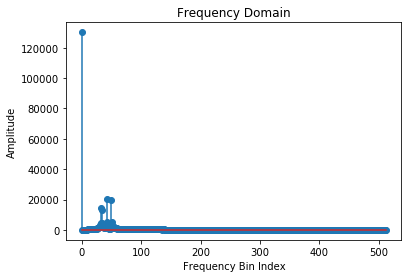

In [8]:
S = np.fft.rfft(ss)
S = abs(S) #the result of the FFT is complex.  Take the abs
plt.stem(S,use_line_collection=True)
plt.xlabel("Frequency Bin Index")
plt.ylabel("Amplitude")
plt.title("Frequency Domain")
plt.show()

There is a large DC offset at 0 Hz because we shifted all values to be positive.  We plot the Fourier transform again without the 0 Hz bin.

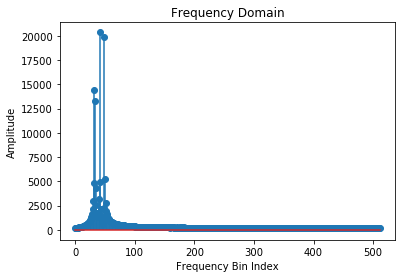

Sampling frequency:  8000
Number of samples used in transform:  1024
Each bin is fs/numSamplesRead = 7.8125  (cycles/second)


In [9]:
S = np.fft.rfft(ss)
S = abs(S) #the result of the FFT is complex.  Take the abs
plt.stem(S[1:],use_line_collection=True)
plt.xlabel("Frequency Bin Index")
plt.ylabel("Amplitude")
plt.title("Frequency Domain")
plt.show()


print("Sampling frequency: ", fs)
print("Number of samples used in transform: ", numSamplesRead)
binSize = fs/numSamplesRead
print("Each bin is fs/numSamplesRead =",binSize," (cycles/second)")

The size of each Fourier transform "bin" is shown above.  This is the range where amplitude from signals within the range are aggregated.

Note that the peaks on the transform are approximately the three tones in the chord.

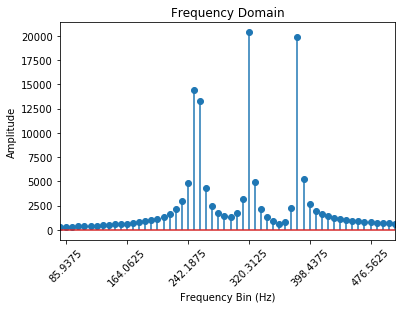

In [10]:
S = np.fft.rfft(ss)
S = abs(S) #the result of the FFT is complex.  Take the abs
plt.stem(S[1:],use_line_collection=True)
plt.xlabel("Frequency Bin (Hz)")
plt.ylabel("Amplitude")
plt.title("Frequency Domain")

x_ticks = np.arange(1,100,step=10)*binSize
x_tick_locs = np.arange(1,100,step=10)
plt.xticks(x_tick_locs,x_ticks,rotation=45)
plt.xlim(10,65)

plt.show()